# A step-by-step neural network

## The Dataset
For this tutorial we will use a dataset called fashion MNIST. Fashion MNIST is a dataset of ten categories of clothing and accessories, in grayscales.

There are 70,000 photos of such images available for us. Each of those images is 28x28 grayscale.

The image categories are:
|Label | Description|
-------| -----------|
0 | T-shirt/top
1 | Trouser
2 | Pullover
3 | Dress
4 | Coat
5 | Sandal
6 | Shirt
7 | Sneaker
8 | Bag
9 | Ankle boot

## Train-validation-test split

There is a rule of thumb when splitting your data. If your data is not that many, maybe in thousands or tens of thousands, then use 70–10–20 as the split strategy. 70% of the data are split into training, 10% into validation, and 20% into the test set.

However, if you have millions of data, then 90–5–5 is a better split strategy. Or, if the data is more than that, maybe you can use 98–1–1 as the split strategy.

The data provided by Keras is already split between the training and testing sets, with 60K for training and 10k for testing. For the validation, let’s take 10% of the training data.

So, it will be 54K images for training, 6K images for validation, and 10K images for testing.

In [43]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [42]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Single-layer perceptron

Let’s start our neural network with a perceptron.

Our image is 28x28, and therefore is two-dimensional. Because of our perceptron only able to read one-dimensional data, let’s flatten them.

We use `to_categorical()`to transform label in one-hot vector

In [16]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Train shape: x =", x_train.shape, " y =", y_train.shape)
print("Test shape: x =", x_test.shape, " y =", y_test.shape)

Train shape: x = (60000, 784)  y = (60000, 10)
Test shape: x = (10000, 784)  y = (10000, 10)


# The model

## Create sequential model

like in previous tutorial we use `model.Sequential()` to create new model.

But in this case we use `softmax` activation and 10 neurons in output layer and `categorical_crossentropy` as loss

In [32]:
model = Sequential()
model.add(Dense(10, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Let's train

In [33]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=2)

Epoch 1/10
1688/1688 - 1s - loss: 0.6451 - accuracy: 0.7824 - val_loss: 0.4974 - val_accuracy: 0.8218 - 817ms/epoch - 484us/step
Epoch 2/10
1688/1688 - 1s - loss: 0.4602 - accuracy: 0.8398 - val_loss: 0.4450 - val_accuracy: 0.8422 - 609ms/epoch - 361us/step
Epoch 3/10
1688/1688 - 1s - loss: 0.4315 - accuracy: 0.8489 - val_loss: 0.4188 - val_accuracy: 0.8453 - 611ms/epoch - 362us/step
Epoch 4/10
1688/1688 - 1s - loss: 0.4148 - accuracy: 0.8552 - val_loss: 0.4239 - val_accuracy: 0.8458 - 612ms/epoch - 363us/step
Epoch 5/10
1688/1688 - 1s - loss: 0.4039 - accuracy: 0.8580 - val_loss: 0.4136 - val_accuracy: 0.8493 - 613ms/epoch - 363us/step
Epoch 6/10
1688/1688 - 1s - loss: 0.3981 - accuracy: 0.8580 - val_loss: 0.4048 - val_accuracy: 0.8530 - 611ms/epoch - 362us/step
Epoch 7/10
1688/1688 - 1s - loss: 0.3911 - accuracy: 0.8620 - val_loss: 0.4099 - val_accuracy: 0.8540 - 613ms/epoch - 363us/step
Epoch 8/10
1688/1688 - 1s - loss: 0.3851 - accuracy: 0.8638 - val_loss: 0.4024 - val_accuracy: 0.

Pretty good. You get 86% accuracy on validation data.

Let’s see on to the testing data:

Pretty good. You get 85/86% accuracy on validation data.

Let’s see on to the testing data:

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy", test_acc)
print("Loss", test_loss)

313/313 [==============================] - 0s 724us/step - loss: 0.4213 - accuracy: 0.8488
Accuracy 0.848800003528595
Loss 0.4213465750217438


And you will get around 84% accuracy on test data. Good enough for this simple architecture.

## Make the network wider


In [35]:
model_wider = Sequential()
model_wider.add(Dense(50, input_dim=784, activation='relu'))
model_wider.add(Dense(10, activation='softmax'))
model_wider.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_wider = model_wider.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=2)

Epoch 1/10
1688/1688 - 1s - loss: 0.5308 - accuracy: 0.8149 - val_loss: 0.4227 - val_accuracy: 0.8482 - 1s/epoch - 612us/step
Epoch 2/10
1688/1688 - 1s - loss: 0.4051 - accuracy: 0.8561 - val_loss: 0.3867 - val_accuracy: 0.8632 - 829ms/epoch - 491us/step
Epoch 3/10
1688/1688 - 1s - loss: 0.3668 - accuracy: 0.8675 - val_loss: 0.3588 - val_accuracy: 0.8678 - 845ms/epoch - 500us/step
Epoch 4/10
1688/1688 - 1s - loss: 0.3425 - accuracy: 0.8772 - val_loss: 0.3491 - val_accuracy: 0.8750 - 846ms/epoch - 501us/step
Epoch 5/10
1688/1688 - 1s - loss: 0.3220 - accuracy: 0.8823 - val_loss: 0.3417 - val_accuracy: 0.8773 - 821ms/epoch - 486us/step
Epoch 6/10
1688/1688 - 1s - loss: 0.3061 - accuracy: 0.8884 - val_loss: 0.3418 - val_accuracy: 0.8745 - 835ms/epoch - 494us/step
Epoch 7/10
1688/1688 - 1s - loss: 0.2948 - accuracy: 0.8918 - val_loss: 0.3567 - val_accuracy: 0.8750 - 823ms/epoch - 487us/step
Epoch 8/10
1688/1688 - 1s - loss: 0.2870 - accuracy: 0.8939 - val_loss: 0.3306 - val_accuracy: 0.880

A whopping 87% accuracy on validation data. Good! It proves that making a bigger network can increase the performance

## Make the network wider
Let’s see on our test data:

In [36]:
test_loss, test_acc = model_wider.evaluate(x_test, y_test)
print("Accuracy", test_acc)
print("Loss", test_loss)

313/313 [==============================] - 0s 377us/step - loss: 0.3440 - accuracy: 0.8755
Accuracy 0.8755000233650208
Loss 0.3440087139606476


## Create a deeper network

In [38]:
model_deeper = Sequential()
model_deeper.add(Dense(50, input_dim=784, activation='relu'))
model_deeper.add(Dense(50, activation='relu'))
model_deeper.add(Dense(10, activation='softmax'))
model_deeper.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_deeper = model_deeper.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=2) 

Epoch 1/10
1688/1688 - 1s - loss: 0.5300 - accuracy: 0.8156 - val_loss: 0.4238 - val_accuracy: 0.8425 - 1s/epoch - 769us/step
Epoch 2/10
1688/1688 - 1s - loss: 0.3970 - accuracy: 0.8584 - val_loss: 0.3738 - val_accuracy: 0.8568 - 892ms/epoch - 528us/step
Epoch 3/10
1688/1688 - 1s - loss: 0.3606 - accuracy: 0.8694 - val_loss: 0.3799 - val_accuracy: 0.8645 - 908ms/epoch - 538us/step
Epoch 4/10
1688/1688 - 1s - loss: 0.3353 - accuracy: 0.8780 - val_loss: 0.3593 - val_accuracy: 0.8675 - 897ms/epoch - 531us/step
Epoch 5/10
1688/1688 - 1s - loss: 0.3191 - accuracy: 0.8840 - val_loss: 0.3546 - val_accuracy: 0.8697 - 888ms/epoch - 526us/step
Epoch 6/10
1688/1688 - 1s - loss: 0.3035 - accuracy: 0.8892 - val_loss: 0.3640 - val_accuracy: 0.8652 - 916ms/epoch - 542us/step
Epoch 7/10
1688/1688 - 1s - loss: 0.2914 - accuracy: 0.8921 - val_loss: 0.3706 - val_accuracy: 0.8660 - 902ms/epoch - 535us/step
Epoch 8/10
1688/1688 - 1s - loss: 0.2823 - accuracy: 0.8955 - val_loss: 0.3588 - val_accuracy: 0.870

Validation accuracy increased by 1%. A better performance.

In [39]:
test_loss, test_acc = model_deeper.evaluate(x_test, y_test)
print("Accuracy", test_acc)
print("Loss", test_loss)

313/313 [==============================] - 0s 385us/step - loss: 0.3411 - accuracy: 0.8765
Accuracy 0.8765000104904175
Loss 0.3411266505718231


## Plot result

Now we plot all results and compare them

/var/folders/5b/qdxrh_011gvbggg89qvhpwbw0000gn/T/ipykernel_49283/1991241795.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/5b/qdxrh_011gvbggg89qvhpwbw0000gn/T/ipykernel_49283/1991241795.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


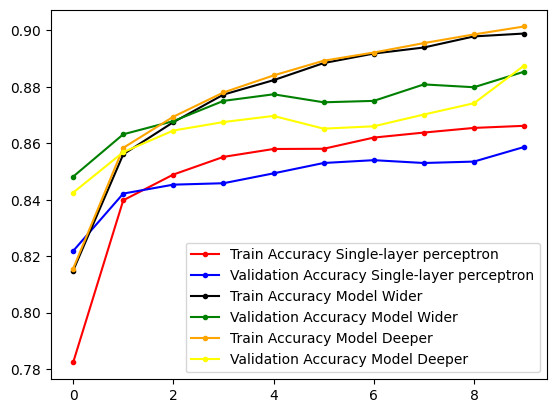

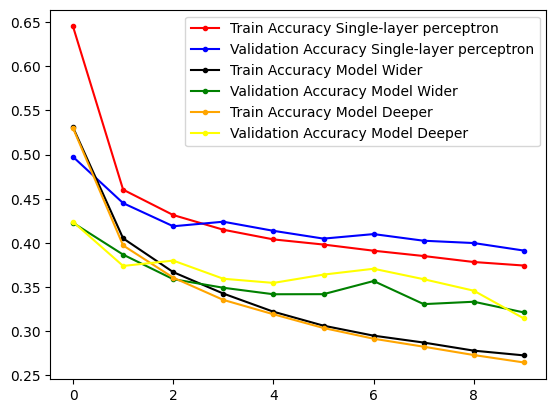

In [44]:
fig, ax = plt.subplots(1, 2, 1)
ax.plot(history.history["accuracy"],'red', marker='.', label="Train Accuracy Single-layer perceptron")
ax.plot(history.history["val_accuracy"],'blue', marker='.', label="Validation Accuracy Single-layer perceptron")
ax.plot(history_wider.history["accuracy"],'black', marker='.', label="Train Accuracy Model Wider")
ax.plot(history_wider.history["val_accuracy"],'green', marker='.', label="Validation Accuracy Model Wider")
ax.plot(history_deeper.history["accuracy"],'orange', marker='.', label="Train Accuracy Model Deeper")
ax.plot(history_deeper.history["val_accuracy"],'yellow', marker='.', label="Validation Accuracy Model Deeper")
ax.legend()
fig.show()
fig, ax = plt.subplots(1, 2, 1)
ax.plot(history.history["loss"],'red', marker='.', label="Train Accuracy Single-layer perceptron")
ax.plot(history.history["val_loss"],'blue', marker='.', label="Validation Accuracy Single-layer perceptron")
ax.plot(history_wider.history["loss"],'black', marker='.', label="Train Accuracy Model Wider")
ax.plot(history_wider.history["val_loss"],'green', marker='.', label="Validation Accuracy Model Wider")
ax.plot(history_deeper.history["loss"],'orange', marker='.', label="Train Accuracy Model Deeper")
ax.plot(history_deeper.history["val_loss"],'yellow', marker='.', label="Validation Accuracy Model Deeper")
ax.legend()
fig.show()

# Convolutional neural network

## Convolutional neural network

A convolutional neural network (CNN) is a neural network that can “see ” a subset of our data. It can detect a pattern in images better than perceptron.

Let’s import the necessary methods and reshape our training data. You can’t flatten it because CNN reads our images as is.

If you check your x_train, you will have 60,000 x 28 x 28 x 1 data.

Why x 1?

The data CNN needs to read must be like this: total_data x width x height x channels.

Height and width are self-explanatory. Channels are like Red or Green or Blue in RGB images. In RGB, because there are three channels, we need to make the data x 3. But because we work with grayscale images, every value on Red, Green, or Blue channel is the same and we reduce to one channel.

In [46]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Convolutional neural network

A convolutional neural network (CNN) is a neural network that can “see ” a subset of our data. It can detect a pattern in images better than perceptron.

Let’s build the architecture:

In [48]:
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(10, activation='softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Convolutional neural network

A convolutional neural network (CNN) is a neural network that can “see ” a subset of our data. It can detect a pattern in images better than perceptron.

will explain you what is inside the network:

In [49]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_19 (Dense)            (None, 10)                125450    
                                                                 
Total params: 125,770
Trainable params: 125,770
Non-trainable params: 0
_________________________________________________________________


## Train the CNN

In [51]:
history_cnn = cnn.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=2)

Epoch 1/10
1688/1688 - 8s - loss: 0.3142 - accuracy: 0.8891 - val_loss: 0.3238 - val_accuracy: 0.8835 - 8s/epoch - 5ms/step
Epoch 2/10
1688/1688 - 8s - loss: 0.2828 - accuracy: 0.8996 - val_loss: 0.2919 - val_accuracy: 0.8972 - 8s/epoch - 5ms/step
Epoch 3/10
1688/1688 - 8s - loss: 0.2623 - accuracy: 0.9073 - val_loss: 0.2917 - val_accuracy: 0.8945 - 8s/epoch - 5ms/step
Epoch 4/10
1688/1688 - 8s - loss: 0.2454 - accuracy: 0.9123 - val_loss: 0.2780 - val_accuracy: 0.9013 - 8s/epoch - 5ms/step
Epoch 5/10
1688/1688 - 8s - loss: 0.2306 - accuracy: 0.9177 - val_loss: 0.2810 - val_accuracy: 0.8985 - 8s/epoch - 5ms/step
Epoch 6/10
1688/1688 - 8s - loss: 0.2195 - accuracy: 0.9211 - val_loss: 0.2809 - val_accuracy: 0.9012 - 8s/epoch - 5ms/step
Epoch 7/10
1688/1688 - 8s - loss: 0.2063 - accuracy: 0.9260 - val_loss: 0.2735 - val_accuracy: 0.9060 - 8s/epoch - 5ms/step
Epoch 8/10
1688/1688 - 8s - loss: 0.1956 - accuracy: 0.9302 - val_loss: 0.2666 - val_accuracy: 0.9038 - 8s/epoch - 5ms/step
Epoch 9/

In [53]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print("Accuracy", test_acc)
print("Loss", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.2988 - accuracy: 0.8945
Accuracy 0.8945000171661377
Loss 0.2987983524799347


## Plot result

Now we plot cnn results and the best result of dense network and compare

/var/folders/5b/qdxrh_011gvbggg89qvhpwbw0000gn/T/ipykernel_49283/2112294716.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/5b/qdxrh_011gvbggg89qvhpwbw0000gn/T/ipykernel_49283/2112294716.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


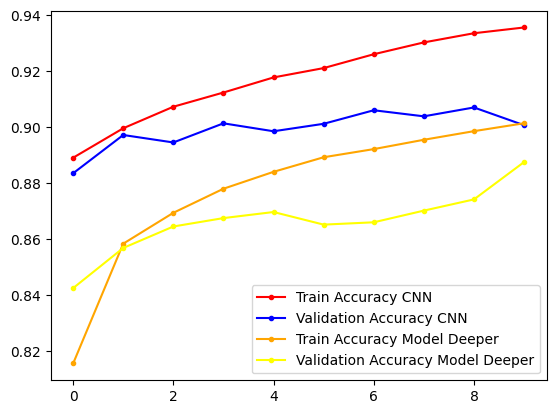

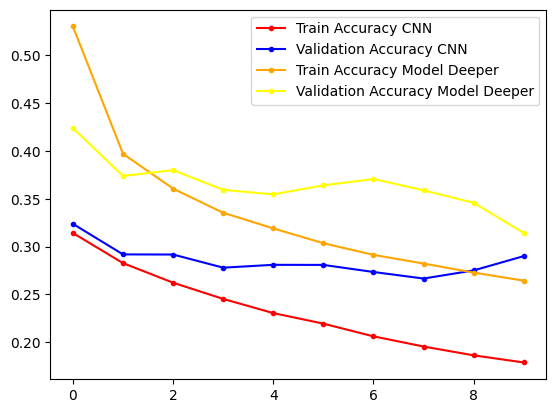

In [59]:
fig, ax = plt.subplots()
ax.plot(history_cnn.history["accuracy"],'red', marker='.', label="Train Accuracy CNN")
ax.plot(history_cnn.history["val_accuracy"],'blue', marker='.', label="Validation Accuracy CNN")
ax.plot(history_deeper.history["accuracy"],'orange', marker='.', label="Train Accuracy Model Deeper")
ax.plot(history_deeper.history["val_accuracy"],'yellow', marker='.', label="Validation Accuracy Model Deeper")
ax.legend()
fig.show()
fig, ax = plt.subplots()
ax.plot(history_cnn.history["loss"],'red', marker='.', label="Train Accuracy CNN")
ax.plot(history_cnn.history["val_loss"],'blue', marker='.', label="Validation Accuracy CNN")
ax.plot(history_deeper.history["loss"],'orange', marker='.', label="Train Accuracy Model Deeper")
ax.plot(history_deeper.history["val_loss"],'yellow', marker='.', label="Validation Accuracy Model Deeper")
ax.legend()
fig.show()